In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows=20

In [5]:
boys = pd.read_csv("boys.csv", index_col=0)
girls = pd.read_csv("girls.csv", index_col=0)

## Each name lives on the unit-simplex

## Each name can be projected to the unit-sphere

## We compute the Bhattacharyya angle (correlation)

In [6]:
# project to unit-simplex
def proj_simplex(ts):
    return ts.fillna(0)/ts.sum()
    
# project to unit-sphere 
def proj_sphere(ts):
    return np.sqrt(proj_simplex(ts))

In [7]:
def match(body1, body2):
    if isinstance(body1, pd.Series):
        body1 = body1.to_frame()
    if isinstance(body2, pd.Series):
        body2 = body2.to_frame()
    x = body1.apply(proj_sphere)
    y = body2.apply(proj_sphere)
    x = pd.DataFrame({key : x[key].dot(y) for key in x.keys()}).stack().sort_values()
    x.index.names = ["Name A", "Name B"]
    return x

In [8]:
x = match(boys["Thomas"], girls)
print(x)

Name A    Name B
Vreneli   Thomas    0.123203
Malea     Thomas    0.139364
Berthe    Thomas    0.188331
Käthe     Thomas    0.201503
Aloisia   Thomas    0.206416
                      ...   
Claudia   Thomas    0.987475
Daniela   Thomas    0.987561
Patricia  Thomas    0.989455
Sabina    Thomas    0.990225
Isabelle  Thomas    0.996147
Length: 1001, dtype: float64


In [9]:
match(boys, boys["Urs"])

Name A  Name B
Urs     Ajan      0.021155
        Lean      0.029118
        Lio       0.029173
        Timéo     0.032286
        Lian      0.034533
                    ...   
        Jörg      0.989443
        Roland    0.989977
        Beat      0.991063
        Jürg      0.996088
        Urs       1.000000
Length: 1001, dtype: float64

In [7]:
match(boys, girls)
# Ruth is amazing!

Name A    Name B 
Bertha    Leart      0.000000
Vreneli   Aurel      0.000000
          Bashkim    0.000000
Gerlinde  Besart     0.000000
Vreneli   Melvin     0.000000
                       ...   
Isabelle  Thomas     0.996147
Ruth      Alfred     0.996206
Marianne  Peter      0.996891
Ursula    Ulrich     0.996977
Ruth      Walter     0.997695
Length: 1002001, dtype: float64

In [16]:
def pair_plot(ts1, ts2, project=True):
    if project:
        ts1 = proj_simplex(ts1)
        ts2 = proj_simplex(ts2)
    print(match(ts1, ts2))
    
    x = pd.DataFrame({ts1.name: ts1, ts2.name: ts2})    
    return x.plot()

Name A     Name B   
Elisabeth  Gottfried    0.950556
dtype: float64


<AxesSubplot:>

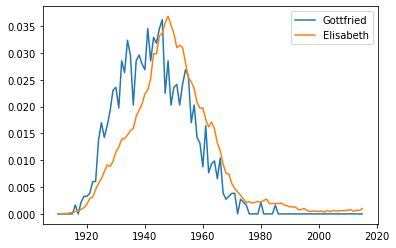

In [17]:
pair_plot(boys["Gottfried"], girls["Elisabeth"], project=True)

In [17]:
pair_plot(boys["Chris"], girls["Rachel"], project=True)

Name A  Name B
Rachel  Chris     0.827544
dtype: float64


In [18]:
pair_plot(boys["Chris"], boys["Christian"], project=False)

Name A     Name B
Christian  Chris     0.632565
dtype: float64


In [19]:
pair_plot(boys["Urs"], boys["Beat"], project=True)

Name A  Name B
Beat    Urs       0.991063
dtype: float64


In [20]:
pair_plot(boys["Walter"], girls["Ruth"])

Name A  Name B
Ruth    Walter    0.997695
dtype: float64


In [21]:
match(boys["Thomas"],girls).mean()

0.7234260956505042

In [18]:
# which girl has the best matching with the boys, e.g. we match each girl against all boys and compute the mean
# for each girl. A high number indicates that the girl would be very compatible
match(boys,girls).reset_index().groupby(by="Name A")[0].mean().sort_values()

Name A
Vreneli     0.170455
Berthe      0.215745
Hulda       0.237297
Aloisia     0.238164
Käthe       0.241385
              ...   
Vera        0.794323
Gloria      0.794494
Carolina    0.794808
Ilona       0.795513
Adriana     0.801120
Name: 0, Length: 1001, dtype: float64

In [19]:
match(boys, girls).reset_index().groupby(by="Name A")[0].mean().sort_values()

Name A
Vreneli     0.170455
Berthe      0.215745
Hulda       0.237297
Aloisia     0.238164
Käthe       0.241385
              ...   
Vera        0.794323
Gloria      0.794494
Carolina    0.794808
Ilona       0.795513
Adriana     0.801120
Name: 0, Length: 1001, dtype: float64